In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=1000

In [3]:
#loading dataset
df=pd.read_csv(r"C:\Users\Dell\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
df.shape

(1470, 35)

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

#imbalance is present

#EDA

Text(0, 0.5, 'Count')

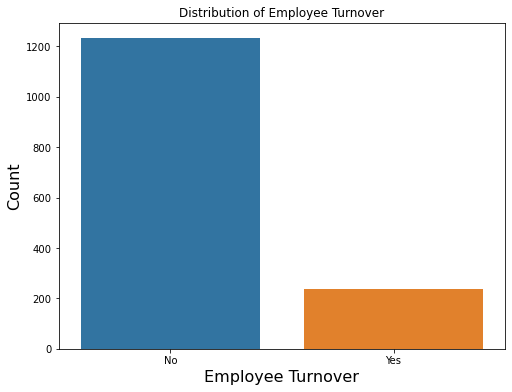

In [10]:
plt.figure(figsize=(8,6))
Attrition=df.Attrition.value_counts()
sb.barplot(x=Attrition.index ,y=Attrition.values)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)

<AxesSubplot:xlabel='Age', ylabel='Density'>

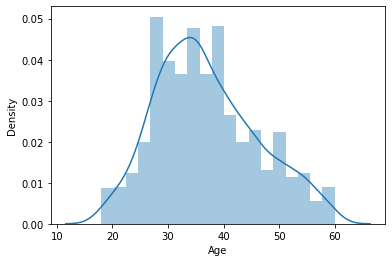

In [12]:
sb.distplot(df['Age'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

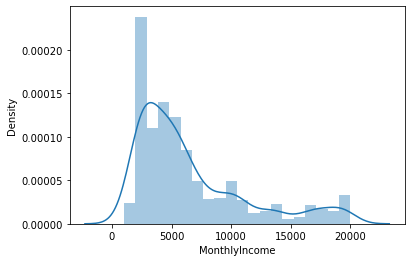

In [13]:
sb.distplot(df['MonthlyIncome'])

In [14]:
#Most the employees have their monthly income around 5000$ and is distribution Rightly Skewed

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

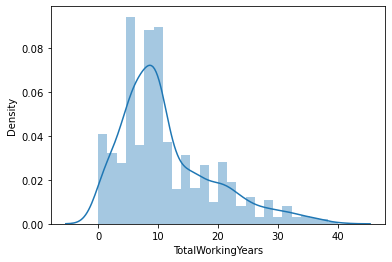

In [16]:
sb.distplot(df['TotalWorkingYears'])

In [21]:
#Method that plot density plots on the columns passed as input
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sb.kdeplot(df.loc[(df['Attrition'] == 'No'),var] , color='b',shade=True, label='no Attrition') 
    ax=sb.kdeplot(df.loc[(df['Attrition'] == 'Yes'),var] , color='r',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

In [22]:
numerical_df=df.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(numerical_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction' ,'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)

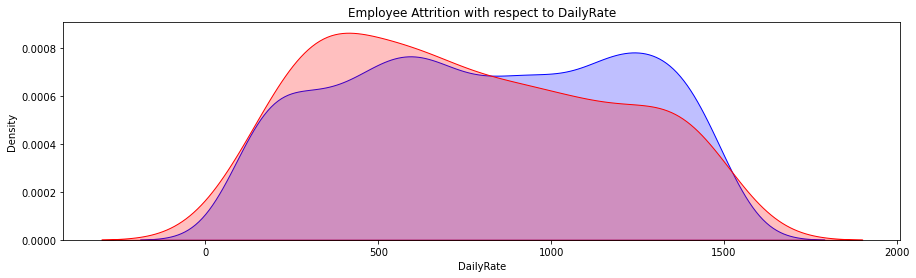

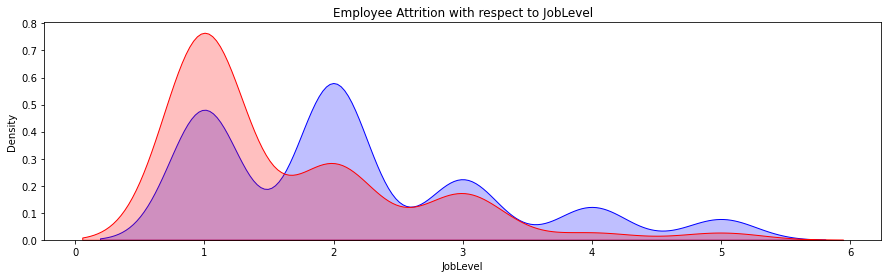

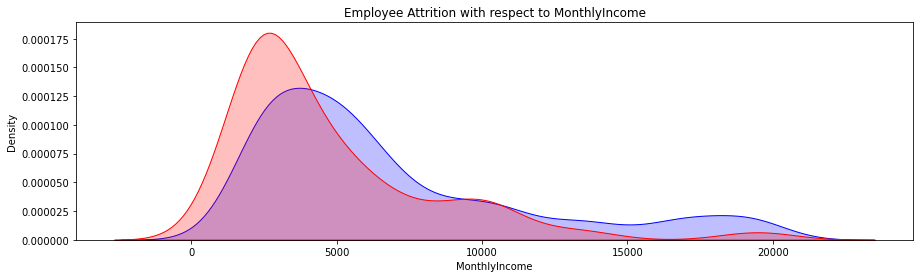

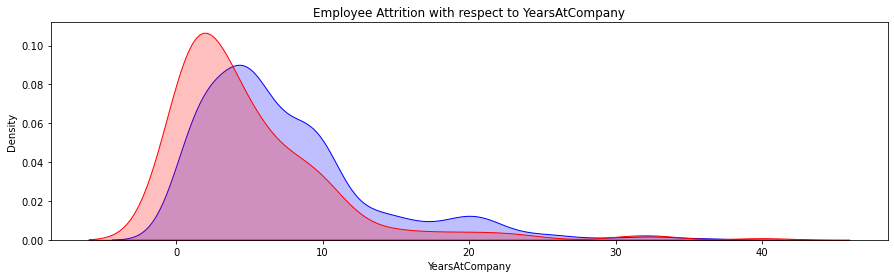

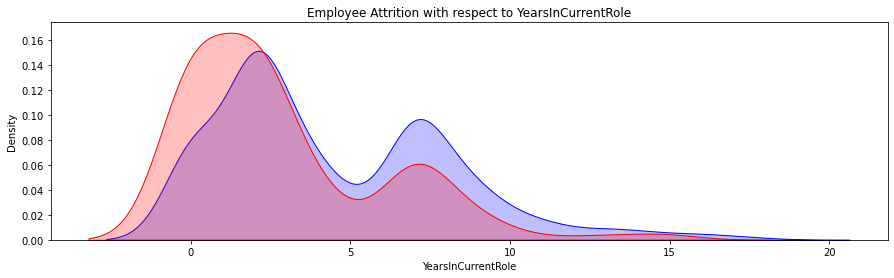

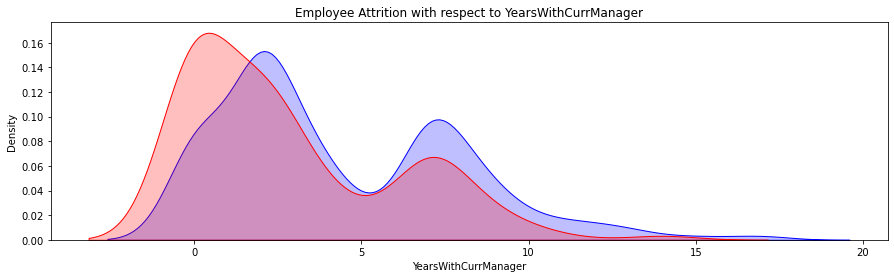

In [23]:
#Plotting KDE plots
for n in numeric_cols_kdeplot:
    kdePlot(n)

Attrition is high with Employees having joblevel as 1.

Employees whose monthly income is below $5000 have high attrition.

Employees who worked in the company around 0 to 1 years have high attrition.

Employees who are in current role for around 0 to 4 years have high attrition.

In [24]:
BarPlot_columns=['Age','DistanceFromHome','EducationField',
                'JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear',
                'WorkLifeBalance','YearsInCurrentRole']

In [27]:
#Method the perform Bar plots
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

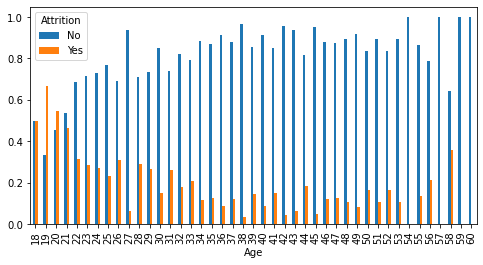

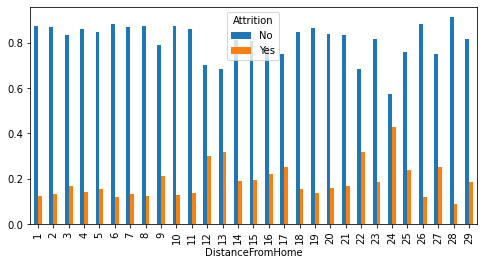

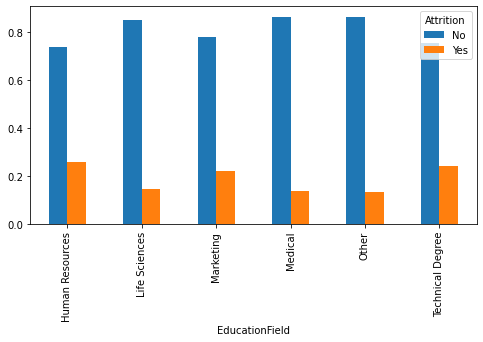

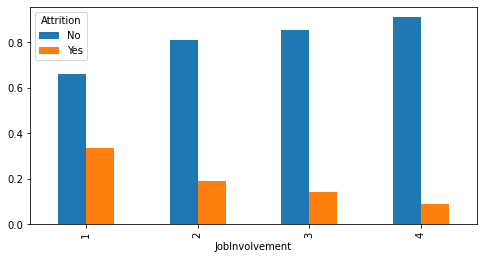

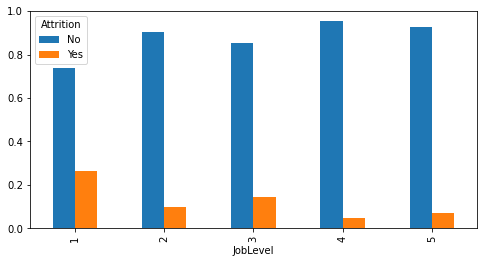

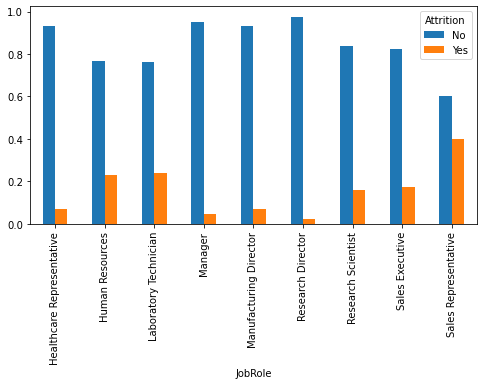

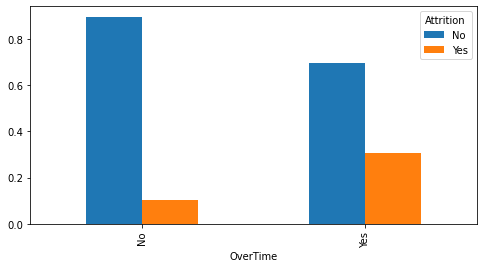

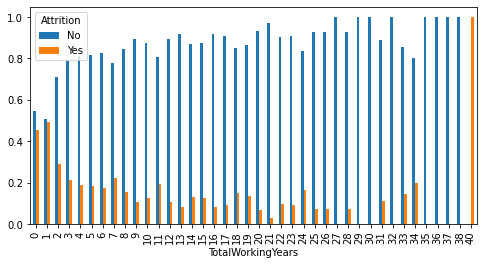

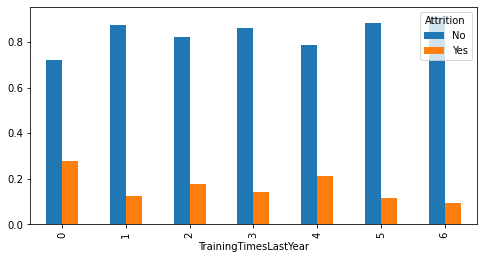

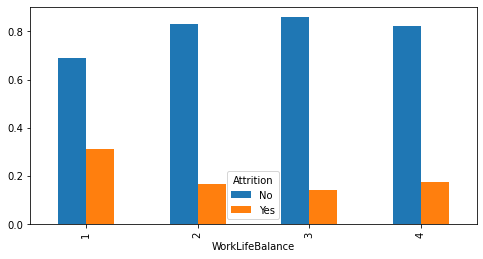

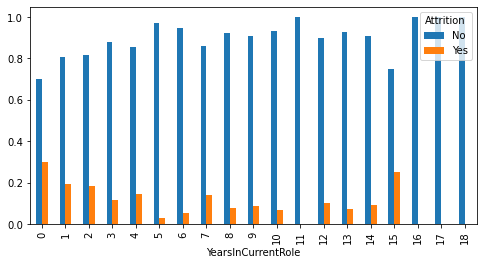

In [28]:
for col in BarPlot_columns:
    Bar_plots(col)


Attrition is very high with employees having age in between 18 to 22. These might be due to students who are doing intership or small contract jobs

Attrition is more when the distance of office is more from home

Attrition is high with employee's education in the field of Human Resources, Marketing and Technical Degree that other fields

Attrition is high with employee's whose job role is in the field of Human Resources, Sales Representative, Laboratory Technician.

Employees who work over time have high attrition than employees who did not do over time

Employees who are working less than 2 years have more attrition

In [29]:
#Replacing Yes with 1 and No with 0 in Attrition Column
df['Attrition']=np.where(df['Attrition']=='No', #condition
                 0, #value if condition is true
                 1)

In [30]:
df.describe().iloc[:,:20]

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000


In [31]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [32]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [33]:
len(set(df.EmployeeNumber))

1470

In [34]:
#Dropping the columns EmployeeCount,StandardHours,EmployeeNumber as these columns does not help in model building.

In [35]:
df=df.drop(['EmployeeCount', 'StandardHours','EmployeeNumber'], axis=1)

In [36]:
df.groupby('Attrition').mean().iloc[:,:20]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
Attrition,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802


In [37]:
df.groupby('Attrition').mean().iloc[:,20:26]

,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,
0,4.484185,2.234388,4.367397
1,2.902954,1.945148,2.852321


<AxesSubplot:>

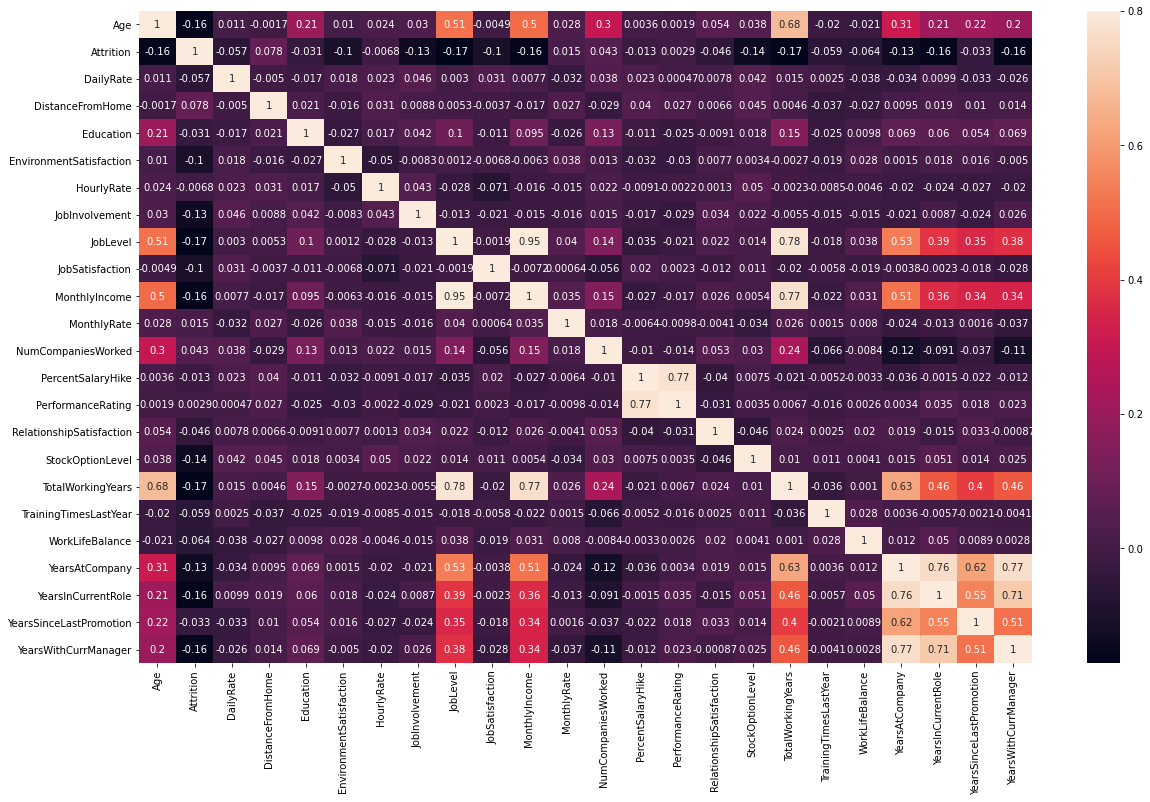

In [38]:
corr_matrix = df.corr()
f , ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_matrix,vmax=0.8, annot=True)

In [39]:
numerical_df=df.select_dtypes(include=np.number)
categorical_df=df.select_dtypes(exclude=np.number)
numeric_cols=list(numerical_df.columns)
categorical_cols=list(categorical_df.columns)

In [40]:
for n in categorical_cols:
    print(pd.crosstab(df['Attrition'],df[n],normalize='columns'))

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                     0.92           0.750903       0.850431
1                     0.08           0.249097       0.149569
Department  Human Resources  Research & Development     Sales
Attrition                                                    
0                  0.809524                0.861602  0.793722
1                  0.190476                0.138398  0.206278
EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
0                      0.740741       0.853135   0.779874  0.864224  0.865854   
1                      0.259259       0.146865   0.220126  0.135776  0.134146   

EducationField  Technical Degree  
Attrition                         
0                       0.757576  
1                       0.242424  
Gender       Female      Male
Attrition    

In [41]:
categorical_df_dummies=pd.get_dummies(df[categorical_cols],drop_first=True)
final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)

In [42]:
final_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [43]:
y=final_df.Attrition
X=final_df.drop(['Attrition'], axis=1)

In [44]:
#Splitting Data in Train and Test Set
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [45]:
#Building base model(Predicting that no employee leaves the company)
base=np.zeros(1470)
print(accuracy_score(base,df.Attrition))

0.8387755102040816


In [46]:
#Method that applies model on the data and Predict the attrition
def model(mod,model_name,x_tr,y_tr,x_tes,y_te):
    mod.fit(x_tr,y_tr)
    pred_dt=mod.predict(x_tes)
    print("     ",model_name,"      ")
    print("Accuracy ",accuracy_score(pred_dt,y_te))
    print("ROC_AUC  ",roc_auc_score(pred_dt,y_te))
    cm=confusion_matrix(pred_dt,y_te)
    print("Confusion Matrix  \n",cm)
    print("                    Classification Report \n",classification_report(pred_dt,y_te))

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model(lr,"Logistic Regression",X_train,y_train,X_test,y_test)

      Logistic Regression       
Accuracy  0.8435374149659864
ROC_AUC   0.9215017064846416
Confusion Matrix  
 [[247  46]
 [  0   1]]
                    Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       293
           1       0.02      1.00      0.04         1

    accuracy                           0.84       294
   macro avg       0.51      0.92      0.48       294
weighted avg       1.00      0.84      0.91       294



In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
model(dt,"Decision Tree",X_train,y_train,X_test,y_test)

      Decision Tree       
Accuracy  0.8503401360544217
ROC_AUC   0.7186617100371747
Confusion Matrix  
 [[236  33]
 [ 11  14]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.88      0.91       269
           1       0.30      0.56      0.39        25

    accuracy                           0.85       294
   macro avg       0.63      0.72      0.65       294
weighted avg       0.90      0.85      0.87       294

